# Data Analysis Project

In [16]:
# Importing packages
import pandas as pd # Data structure and analysis package
import numpy as np # Computing package
import seaborn as sns # Additional graphs and layout
import matplotlib.pyplot as plt # Plots
import pydst # Statistics Denmark (DST)
from datetime import datetime # Formating dates
import ipywidgets as widgets # interactive plots
from IPython.display import display # display multiple outputs from a single cell

## 1. Importing and cleaning data

In [17]:
Dst = pydst.Dst(lang='en') # Set language to English

In [18]:
Dst.get_subjects() # Get overview of Statistics Denmark's subjects

,active,desc,hasSubjects,id
0,True,Population and elections,True,02
1,True,Living conditions,True,05
2,True,Education and knowledge,True,03
3,True,Culture and National Church,True,18
4,True,"Labour, income and wealth",True,04
5,True,Prices and consumption,True,06
6,True,National accounts and government finances,True,14
7,True,Money and credit market,True,16
8,True,External economy,True,13
9,True,Business sector in general,True,07


In our future analysis we drill down into Denmark's current account which is found in Statistics Denmark's table 'BB1S'. 

In [19]:
Var = Dst.get_variables(table_id = 'BB1S')

Before going into a deeper analysis, we would like to get an overview of the data.

In [20]:
Var[:]

,elimination,id,text,time,values
0,True,POST,items,False,"[{'id': '1.A.A', 'text': 'GOODS (FOB)'}, {'id'..."
1,False,INDUDBOP,receipts/expenditure,False,"[{'id': 'K', 'text': 'Current receipts'}, {'id..."
2,False,SÆSON,seasonal adjustment,False,"[{'id': '1', 'text': 'Non-seasonally adjusted'..."
3,True,LAND,country,False,"[{'id': 'W1', 'text': 'REST OF THE WORLD'}, {'..."
4,False,Tid,time,True,"[{'id': '2005M01', 'text': '2005M01'}, {'id': ..."


For future analysis we look deeper into the acronyms by changing the index. We notice that the acronyms of the fifth element (index 4) is simply the time values and therefore we do not include these.

In [21]:
Var0 = pd.DataFrame(Var['values'][0])
for i in range(1,4):
    Var0 = Var0.append(Var['values'][i])
Var0

,id,text
0,1.A.A,GOODS (FOB)
1,1.A.B,SERVICES
2,1.B,PRIMARY INCOME
3,1.C,SECONDARY INCOME
4,1,CURRENT ACCOUNT
0,K,Current receipts
1,D,Current expenditure
2,N,Net receipts
0,1,Non-seasonally adjusted
1,2,Seasonally adjusted


First we choose to look at the following dataframe, df1.

In [23]:
df1= Dst.get_data(table_id = 'BB1S', variables={'TID':['*'], 
                                               'SÆSON':['2'], 'LAND':['*'], 'POST':['*'], 'INDUDBOP':['N']})
df1.head(5)

,TID,SÆSON,LAND,POST,INDUDBOP,INDHOLD
0,2012M04,Seasonally adjusted,EU-28,PRIMARY INCOME,Net receipts,-1.8
1,2012M04,Seasonally adjusted,Extra EU-28,PRIMARY INCOME,Net receipts,5.5
2,2012M04,Seasonally adjusted,REST OF THE WORLD,PRIMARY INCOME,Net receipts,3.7
3,2012M04,Seasonally adjusted,EU-28,SECONDARY INCOME,Net receipts,-1.6
4,2012M04,Seasonally adjusted,Extra EU-28,SECONDARY INCOME,Net receipts,-1.5


We notice that the dataframe, df1, is not sorted in accordance to dates as the dataset starts in 2005. To get an overview of the dataframe we group by accounts and geographical area and colour the negative values red.

## 2. Descriptive statistics

In [24]:
def colourmap(x):
    '''
    Colour negative values red
    Black otherwise
    '''
    if x < 0:
        color = 'red'
    else:
        color = 'black'
    return r'color: %s' % color
df1.sort_values(['TID'], inplace=True)
Descriptive = df1.groupby(['POST','LAND']).describe().style.applymap(colourmap)
Descriptive

We notice that the current account is overall positive, but negative within the EU-28. Specifically, Denmark has a deficit in regards to services, primary and secondary income when trading with the other EU member states (EU-28). Vi skal lige soge hvor datasættet starter og slutter.

Moving on, we are only interested in the current account to the whole world (REST OF THE WORLD). Therefore, we specify 'Land'='W1'.

In [45]:
df= Dst.get_data(table_id = 'BB1S', variables={'TID':['*'], 
                                               'SÆSON':['2'], 'LAND':['W1'], 'POST':['*'], 'INDUDBOP':['N']})
df.sort_values(['TID'], inplace=True)
df.head(5)

,TID,SÆSON,LAND,POST,INDUDBOP,INDHOLD
828,2005M01,Seasonally adjusted,REST OF THE WORLD,SERVICES,Net receipts,2.1
830,2005M01,Seasonally adjusted,REST OF THE WORLD,SECONDARY INCOME,Net receipts,-2.2
826,2005M01,Seasonally adjusted,REST OF THE WORLD,CURRENT ACCOUNT,Net receipts,6.5
827,2005M01,Seasonally adjusted,REST OF THE WORLD,GOODS (FOB),Net receipts,5.8
829,2005M01,Seasonally adjusted,REST OF THE WORLD,PRIMARY INCOME,Net receipts,0.8


The dataframe looks nice, but in order to plot the accounts, we need to format our time column accordingly. Further, "REST OF THE WORLD" does not seem to be an appropriate name for the whole world. Therefore, we change the name to "Whole world".

In [46]:
df['LAND'] = df['LAND'].str.replace('REST OF THE WORLD', 'Whole world')
df['TID'] = df['TID'].str.replace('M', '-')
df['TID'] = pd.to_datetime(df['TID'])
display(df.head(5))
display(df.tail(5))

,TID,SÆSON,LAND,POST,INDUDBOP,INDHOLD
828,2005-01-01,Seasonally adjusted,Whole world,SERVICES,Net receipts,2.1
830,2005-01-01,Seasonally adjusted,Whole world,SECONDARY INCOME,Net receipts,-2.2
826,2005-01-01,Seasonally adjusted,Whole world,CURRENT ACCOUNT,Net receipts,6.5
827,2005-01-01,Seasonally adjusted,Whole world,GOODS (FOB),Net receipts,5.8
829,2005-01-01,Seasonally adjusted,Whole world,PRIMARY INCOME,Net receipts,0.8


,TID,SÆSON,LAND,POST,INDUDBOP,INDHOLD
42,2019-02-01,Seasonally adjusted,Whole world,CURRENT ACCOUNT,Net receipts,13.6
46,2019-02-01,Seasonally adjusted,Whole world,SECONDARY INCOME,Net receipts,-2.9
45,2019-02-01,Seasonally adjusted,Whole world,PRIMARY INCOME,Net receipts,3.5
44,2019-02-01,Seasonally adjusted,Whole world,SERVICES,Net receipts,0.3
43,2019-02-01,Seasonally adjusted,Whole world,GOODS (FOB),Net receipts,12.7


From the table above we see that our dataset contains monthly data covering the period from the first month of 2005 until and including the first month of 2019. Futher, we define our accounts.

In [47]:
posts= ['PRIMARY INCOME','SERVICES','SECONDARY INCOME','GOODS (FOB)','CURRENT ACCOUNT']
keys=['PI','S','SI', 'G', 'CA']

dic = {}

for i,lab in enumerate(posts):
    dic[keys[i]]=df.loc[df['POST'] == lab, :]

PI, S, SI, G, CA = dic.values()

Variables = pd.DataFrame(df['POST'].unique())
Variables.columns = ['Accounts']
Variables['Acronyms'] = ('S', 'SI','CA', 'G', 'PI')

display(Variables.style.hide_index())

Accounts,Acronyms
SERVICES,S
SECONDARY INCOME,SI
CURRENT ACCOUNT,CA
GOODS (FOB),G
PRIMARY INCOME,PI


To analyse deeper we plot our accounts. The *current account* identity is as follows:

$$CA = PI + S + SI + G$$

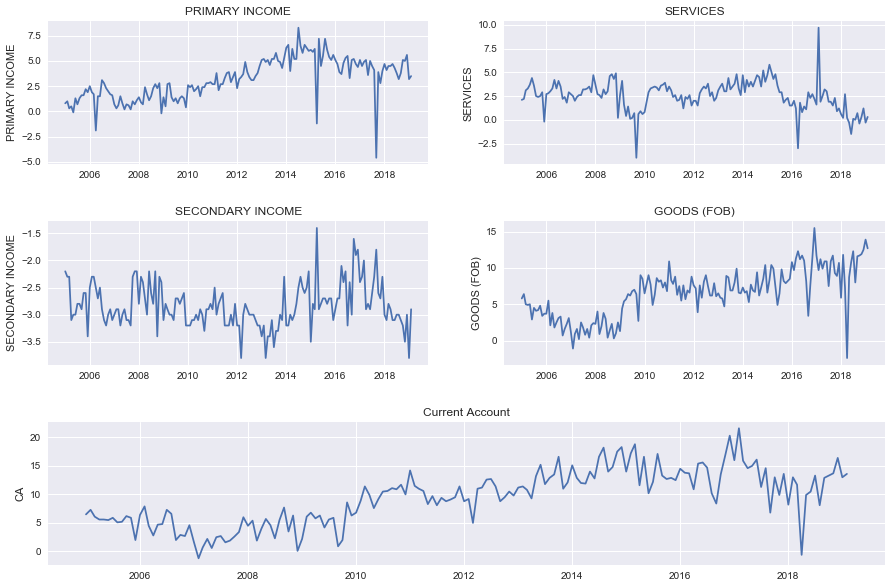

In [38]:
plt.style.use('seaborn')
fig, axs = plt.subplots(3,2,figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)

titles = Variables['Acronyms'][:4]
lable = Variables['Accounts'][:4]
idx = range(len(titles))
for i, p, k in zip(idx, posts, keys):
    df = dic[k]
    plt.subplot(3, 2, i+1)
    plt.plot(df['TID'],df['INDHOLD'])
    plt.ylabel(p)
    plt.title(p)
    if i == 3:
        plt.subplot(3, 1, 3)
        plt.plot(CA['TID'],CA['INDHOLD'])
        plt.ylabel('CA')
        plt.title('Current Account')


plt.show('Historical plot')

In general this is in line with our previous findings. However, as the vertical axis change between figures, it is difficult to compare the accounts. In order to solve this problem, we make an interactive plot displaying all accounts in one graph.

In [39]:
def myplot_2(Current_account, Services, Secondary_income, Goods, Primary_income):
            if Current_account==1:
                plot1 = plt.plot(PI['TID'], CA['INDHOLD'], 'black', label='Current account')
            else:
                plot1 = ""
            if Services==1:
                plot2 = plt.plot(PI['TID'], S['INDHOLD'], 'blue', label='Services')
            else:
                plot2 = ""
            if Secondary_income==1:
                plot3 = plt.plot(PI['TID'], SI['INDHOLD'], 'green', label='Secondary income')
            else:
                plot3 = ""
            if Goods==1:
                plot4 = plt.plot(PI['TID'], G['INDHOLD'], 'y', label='Goods')
            else:
                plot4=""
            if Primary_income==1:
                plot5 = plt.plot(PI['TID'], PI['INDHOLD'], 'red', label='Primary income')
            else:
                plot5 =""
                
            plt.xlabel('Time')
            plt.ylabel('Billion DKK')
            plt.title('All accounts plotted against each other')
            plt.legend()
            plt.show(myplot_2)
    

widgets.interactive(myplot_2, Current_account=True, Services=True, Secondary_income=True, Goods=True, Primary_income=True)

interactive(children=(Checkbox(value=True, description='Current_account'), Checkbox(value=True, description='S…

We see that the surplus of the current account has increased over the years. We are curious to see how much the current account has accumulated to over the period since 2005, hence we use itertools to accumulate the current account.

In [40]:
CA['Accumulate'] = CA['INDHOLD'].cumsum()
CA.head()

,TID,SÆSON,LAND,POST,INDUDBOP,INDHOLD,Accumulate
826,2005-01-01,Seasonally adjusted,Whole world,CURRENT ACCOUNT,Net receipts,6.5,6.5
831,2005-02-01,Seasonally adjusted,Whole world,CURRENT ACCOUNT,Net receipts,7.3,13.8
836,2005-03-01,Seasonally adjusted,Whole world,CURRENT ACCOUNT,Net receipts,6.1,19.9
841,2005-04-01,Seasonally adjusted,Whole world,CURRENT ACCOUNT,Net receipts,5.6,25.5
846,2005-05-01,Seasonally adjusted,Whole world,CURRENT ACCOUNT,Net receipts,5.6,31.1


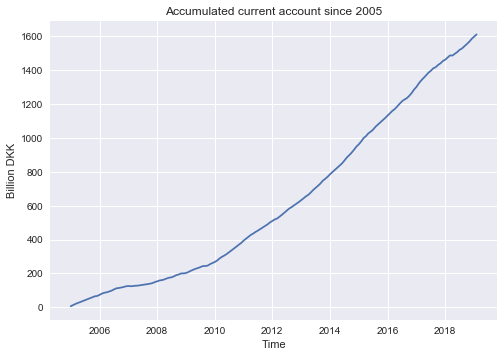

In [42]:
sns.lineplot(CA['TID'],CA['Accumulate'])
plt.xlabel('Time')
plt.ylabel('Billion DKK')
plt.title('Accumulated current account since 2005')
plt.show()

We see that in the period 2005(1) to 2019(1) the current account accumulates to just above DKK 1600 billion.  

## 3. Conclusion

In general the Danish current account is increasing in the period 2005(1) to 2019(1). However, the current account is on average negative against the the EU-28. This deficit is countered by the surplus from the Danish current account against countries outside the EU-28 resulting in an overall surplus. In the period 2005(1) to 2019(1) the surplus of the current account accumulates to just above DKK 1600 billion.